<a href="https://colab.research.google.com/github/kagglematsuo/Rapid_Challenge_Report/blob/master/2_4_optimizer_after.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [12]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/DNN_code_colab_lesson_1_2')

# optimizer

## SGD

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.1521
Generation: 20. 正答率(トレーニング) = 0.24
                : 20. 正答率(テスト) = 0.2065
Generation: 30. 正答率(トレーニング) = 0.24
                : 30. 正答率(テスト) = 0.2091
Generation: 40. 正答率(トレーニング) = 0.19
                : 40. 正答率(テスト) = 0.2128
Generation: 50. 正答率(トレーニング) = 0.26
                : 50. 正答率(テスト) = 0.2233
Generation: 60. 正答率(トレーニング) = 0.27
                : 60. 正答率(テスト) = 0.2425
Generation: 70. 正答率(トレーニング) = 0.22
                : 70. 正答率(テスト) = 0.2692
Generation: 80. 正答率(トレーニング) = 0.37
                : 80. 正答率(テスト) = 0.2962
Generation: 90. 正答率(トレーニング) = 0.3
                : 90. 正答率(テスト) = 0.362
Generation: 100. 正答率(トレーニング) = 0.4
                : 100. 正答率(テスト) = 0.3598
Generation: 110. 正答率(トレーニング) = 0.38
                : 110. 正答率(テスト) = 0.3532
Generation: 120. 正答率(トレーニング) = 0.34
                : 120. 正答率(テスト) = 0.3508
Generation: 130. 正答率(トレーニング) = 0.35
                : 130. 正答率(テスト) = 0.3329
Generation

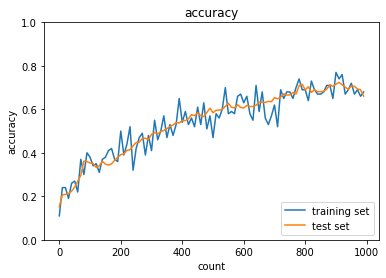

In [13]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.67
                : 10. 正答率(テスト) = 0.5568
Generation: 20. 正答率(トレーニング) = 0.69
                : 20. 正答率(テスト) = 0.6385
Generation: 30. 正答率(トレーニング) = 0.77
                : 30. 正答率(テスト) = 0.7249
Generation: 40. 正答率(トレーニング) = 0.78
                : 40. 正答率(テスト) = 0.8082
Generation: 50. 正答率(トレーニング) = 0.85
                : 50. 正答率(テスト) = 0.8257
Generation: 60. 正答率(トレーニング) = 0.9
                : 60. 正答率(テスト) = 0.8631
Generation: 70. 正答率(トレーニング) = 0.86
                : 70. 正答率(テスト) = 0.8494
Generation: 80. 正答率(トレーニング) = 0.83
                : 80. 正答率(テスト) = 0.8675
Generation: 90. 正答率(トレーニング) = 0.91
                : 90. 正答率(テスト) = 0.8618
Generation: 100. 正答率(トレーニング) = 0.84
                : 100. 正答率(テスト) = 0.8353
Generation: 110. 正答率(トレーニング) = 0.91
                : 110. 正答率(テスト) = 0.8437
Generation: 120. 正答率(トレーニング) = 0.95
                : 120. 正答率(テスト) = 0.8797
Generation: 130. 正答率(トレーニング) = 0.85
                : 130. 正答率(テスト) = 0.8762
Generati

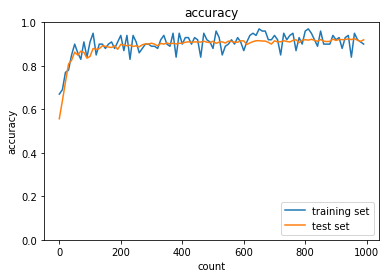

In [14]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.3
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## AdaGrad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.63
                : 10. 正答率(テスト) = 0.5636
Generation: 20. 正答率(トレーニング) = 0.77
                : 20. 正答率(テスト) = 0.6566
Generation: 30. 正答率(トレーニング) = 0.76
                : 30. 正答率(テスト) = 0.6666
Generation: 40. 正答率(トレーニング) = 0.78
                : 40. 正答率(テスト) = 0.7557
Generation: 50. 正答率(トレーニング) = 0.8
                : 50. 正答率(テスト) = 0.7678
Generation: 60. 正答率(トレーニング) = 0.84
                : 60. 正答率(テスト) = 0.7985
Generation: 70. 正答率(トレーニング) = 0.91
                : 70. 正答率(テスト) = 0.8289
Generation: 80. 正答率(トレーニング) = 0.82
                : 80. 正答率(テスト) = 0.8456
Generation: 90. 正答率(トレーニング) = 0.87
                : 90. 正答率(テスト) = 0.8205
Generation: 100. 正答率(トレーニング) = 0.87
                : 100. 正答率(テスト) = 0.844
Generation: 110. 正答率(トレーニング) = 0.92
                : 110. 正答率(テスト) = 0.8295
Generation: 120. 正答率(トレーニング) = 0.9
                : 120. 正答率(テスト) = 0.857
Generation: 130. 正答率(トレーニング) = 0.87
                : 130. 正答率(テスト) = 0.8656
Generation:

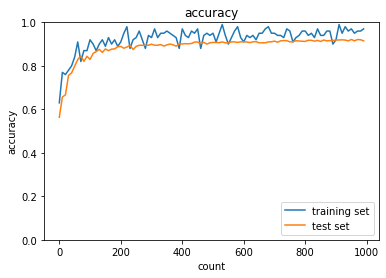

In [15]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.full_like(network.params[key], 1e-4)
        else:
            h[key] += np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]))

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RMSprop

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.59
                : 10. 正答率(テスト) = 0.5084
Generation: 20. 正答率(トレーニング) = 0.73
                : 20. 正答率(テスト) = 0.6793
Generation: 30. 正答率(トレーニング) = 0.87
                : 30. 正答率(テスト) = 0.7647
Generation: 40. 正答率(トレーニング) = 0.84
                : 40. 正答率(テスト) = 0.7528
Generation: 50. 正答率(トレーニング) = 0.86
                : 50. 正答率(テスト) = 0.7968
Generation: 60. 正答率(トレーニング) = 0.8
                : 60. 正答率(テスト) = 0.7948
Generation: 70. 正答率(トレーニング) = 0.91
                : 70. 正答率(テスト) = 0.8427
Generation: 80. 正答率(トレーニング) = 0.93
                : 80. 正答率(テスト) = 0.8662
Generation: 90. 正答率(トレーニング) = 0.91
                : 90. 正答率(テスト) = 0.8529
Generation: 100. 正答率(トレーニング) = 0.96
                : 100. 正答率(テスト) = 0.8798
Generation: 110. 正答率(トレーニング) = 0.89
                : 110. 正答率(テスト) = 0.877
Generation: 120. 正答率(トレーニング) = 0.94
                : 120. 正答率(テスト) = 0.8794
Generation: 130. 正答率(トレーニング) = 0.9
                : 130. 正答率(テスト) = 0.8645
Generation

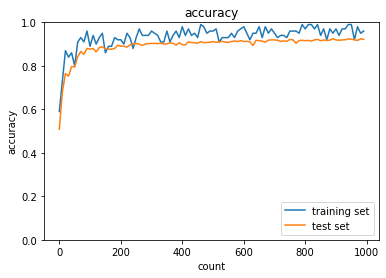

In [16]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.47
                : 10. 正答率(テスト) = 0.3959
Generation: 20. 正答率(トレーニング) = 0.41
                : 20. 正答率(テスト) = 0.3961
Generation: 30. 正答率(トレーニング) = 0.46
                : 30. 正答率(テスト) = 0.5758
Generation: 40. 正答率(トレーニング) = 0.69
                : 40. 正答率(テスト) = 0.6712
Generation: 50. 正答率(トレーニング) = 0.69
                : 50. 正答率(テスト) = 0.7383
Generation: 60. 正答率(トレーニング) = 0.71
                : 60. 正答率(テスト) = 0.7303
Generation: 70. 正答率(トレーニング) = 0.77
                : 70. 正答率(テスト) = 0.789
Generation: 80. 正答率(トレーニング) = 0.9
                : 80. 正答率(テスト) = 0.7948
Generation: 90. 正答率(トレーニング) = 0.84
                : 90. 正答率(テスト) = 0.8285
Generation: 100. 正答率(トレーニング) = 0.89
                : 100. 正答率(テスト) = 0.8389
Generation: 110. 正答率(トレーニング) = 0.86
                : 110. 正答率(テスト) = 0.8315
Generation: 120. 正答率(トレーニング) = 0.88
                : 120. 正答率(テスト) = 0.8389
Generation: 130. 正答率(トレーニング) = 0.83
                : 130. 正答率(テスト) = 0.8583
Generatio

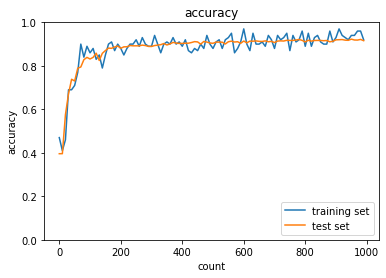

In [17]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

バッチ正規化によって学習が早くなることが確認できた